# EDA and Pre processing

In [23]:
#import essential libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [24]:
# load files 
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")


#overview of dataset 
print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")

Train Shape: (59611, 24)
Test Shape: (14900, 23)


In [25]:
#display first few rows
train.head()

,founder_id,founder_age,founder_gender,years_with_startup,founder_role,monthly_revenue_generated,work_life_balance_rating,venture_satisfaction,startup_performance_rating,funding_rounds_led,...,num_dependents,startup_stage,team_size_category,years_since_founding,remote_operations,leadership_scope,innovation_support,startup_reputation,founder_visibility,retention_status
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.0,Poor,High,Low,3,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989.0,Good,High,High,1,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,NaN,NaN,Average,0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [26]:
# Check data types and non-null counts
print("\n--- Data Info ---")
print(train.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59611 entries, 0 to 59610
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   founder_id                  59611 non-null  int64  
 1   founder_age                 59611 non-null  int64  
 2   founder_gender              59611 non-null  object 
 3   years_with_startup          59611 non-null  int64  
 4   founder_role                59611 non-null  object 
 5   monthly_revenue_generated   57811 non-null  float64
 6   work_life_balance_rating    49467 non-null  object 
 7   venture_satisfaction        52447 non-null  object 
 8   startup_performance_rating  59611 non-null  object 
 9   funding_rounds_led          59611 non-null  int64  
 10  working_overtime            59611 non-null  object 
 11  distance_from_investor_hub  59611 non-null  int64  
 12  education_background        59611 non-null  object 
 13  personal_sta

In [28]:
# Correct column definitions

id_col = "founder_id"
target = "retention_status"

num_cols = [
    "founder_age",
    "years_with_startup",
    "monthly_revenue_generated",
    "funding_rounds_led",
    "distance_from_investor_hub",
    "num_dependents",
    "years_since_founding"
]

cat_cols = [
    "founder_gender",
    "founder_role",
    "work_life_balance_rating",
    "venture_satisfaction",
    "startup_performance_rating",
    "working_overtime",
    "education_background",
    "personal_status",
    "startup_stage",
    "team_size_category",
    "remote_operations",
    "leadership_scope",
    "innovation_support",
    "startup_reputation",
    "founder_visibility"
]

In [29]:
#statistics of the data
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
founder_id,59611.0,NaN,NaN,NaN,37224.692171,21519.598309,1.0,18576.0,37207.0,55874.5,74498.0
founder_age,59611.0,NaN,NaN,NaN,38.562497,12.0825,6.0,28.0,39.0,49.0,59.0
founder_gender,59611,2,Male,32747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_with_startup,59611.0,NaN,NaN,NaN,15.75263,11.245724,1.0,7.0,13.0,23.0,51.0
founder_role,59611,5,Technology,15509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_revenue_generated,57811.0,NaN,NaN,NaN,7311.07035,2197.444033,1316.0,5661.0,7358.0,8882.0,56050.0
work_life_balance_rating,49467,4,Good,18755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
venture_satisfaction,52447,4,High,26255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startup_performance_rating,59611,4,Average,35818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funding_rounds_led,59611.0,NaN,NaN,NaN,0.832514,0.994987,0.0,0.0,1.0,2.0,4.0


In [30]:
# 1. Check for EXACT duplicates (Every column is identical)
exact_dupes_count = train.duplicated().sum()
print(f"Count of exact row duplicates: {exact_dupes_count}")

# View the actual duplicate rows (if any)
if exact_dupes_count > 0:
    print("\n--- Exact Duplicate Rows ---")
    display(train[train.duplicated(keep=False)]) # keep=False shows ALL copies of the duplicate

Count of exact row duplicates: 13

--- Exact Duplicate Rows ---


,founder_id,founder_age,founder_gender,years_with_startup,founder_role,monthly_revenue_generated,work_life_balance_rating,venture_satisfaction,startup_performance_rating,funding_rounds_led,...,num_dependents,startup_stage,team_size_category,years_since_founding,remote_operations,leadership_scope,innovation_support,startup_reputation,founder_visibility,retention_status
4448,71428,30,Female,9,Healthcare,NaN,NaN,NaN,Average,2,...,NaN,Entry,NaN,NaN,No,No,No,Fair,Low,Left
6072,26393,37,Male,17,Technology,NaN,NaN,NaN,Average,0,...,NaN,Mid,NaN,NaN,No,No,No,Good,Low,Left
8305,17110,38,Male,9,Finance,NaN,NaN,NaN,Average,0,...,NaN,Entry,NaN,NaN,No,No,No,Good,Low,Stayed
9249,1973,28,Male,6,Media,NaN,NaN,NaN,Average,1,...,NaN,Entry,NaN,NaN,No,No,No,Good,High,Left
10130,3940,23,Male,1,Healthcare,NaN,NaN,NaN,Low,0,...,NaN,Senior,NaN,NaN,No,No,No,Good,Medium,Left
12358,54760,37,Female,26,Technology,NaN,NaN,NaN,High,0,...,NaN,Mid,NaN,NaN,Yes,No,No,Good,Medium,Stayed
15550,41745,18,Male,3,Finance,NaN,NaN,NaN,High,3,...,NaN,Entry,NaN,NaN,No,No,No,Good,Medium,Left
26253,18701,12,Male,12,Education,NaN,NaN,NaN,Average,0,...,NaN,Entry,NaN,NaN,No,No,No,Good,Medium,Stayed
31132,23782,55,Female,26,Finance,NaN,NaN,NaN,Average,0,...,NaN,Mid,NaN,NaN,No,No,Yes,Excellent,Medium,Left
37300,7984,47,Female,2,Finance,NaN,NaN,NaN,Average,0,...,NaN,Entry,NaN,NaN,No,No,No,Good,Very High,Left


In [31]:
# Drop exact duplicates, keeping the first occurrence
train = train.drop_duplicates()

# Verify they are gone
print(f"New Train Shape: {train.shape}")
print(f"Exact duplicates remaining: {train.duplicated().sum()}")

New Train Shape: (59598, 24)
Exact duplicates remaining: 0


In [32]:
#learn about the target 
target='retention_status'
train[target].describe()

count      59598
unique         2
top       Stayed
freq       31260
Name: retention_status, dtype: object

In [33]:
#final any null values in the target 
train.shape
print("Missing in target:",train[target].isnull().sum())

Missing in target: 0


In [34]:
# count of missing values
print(train.isnull().sum().sort_values(ascending=False))

work_life_balance_rating      10131
venture_satisfaction           7151
num_dependents                 4767
years_since_founding           4171
team_size_category             2979
monthly_revenue_generated      1787
years_with_startup                0
founder_id                        0
founder_role                      0
founder_age                       0
founder_gender                    0
startup_performance_rating        0
distance_from_investor_hub        0
education_background              0
working_overtime                  0
funding_rounds_led                0
startup_stage                     0
personal_status                   0
remote_operations                 0
leadership_scope                  0
innovation_support                0
startup_reputation                0
founder_visibility                0
retention_status                  0
dtype: int64


,missing_pct
work_life_balance_rating,0.169989
venture_satisfaction,0.119987
num_dependents,0.079986
years_since_founding,0.069986
team_size_category,0.049985
monthly_revenue_generated,0.029984
years_with_startup,0.000000
founder_id,0.000000
founder_role,0.000000
founder_age,0.000000


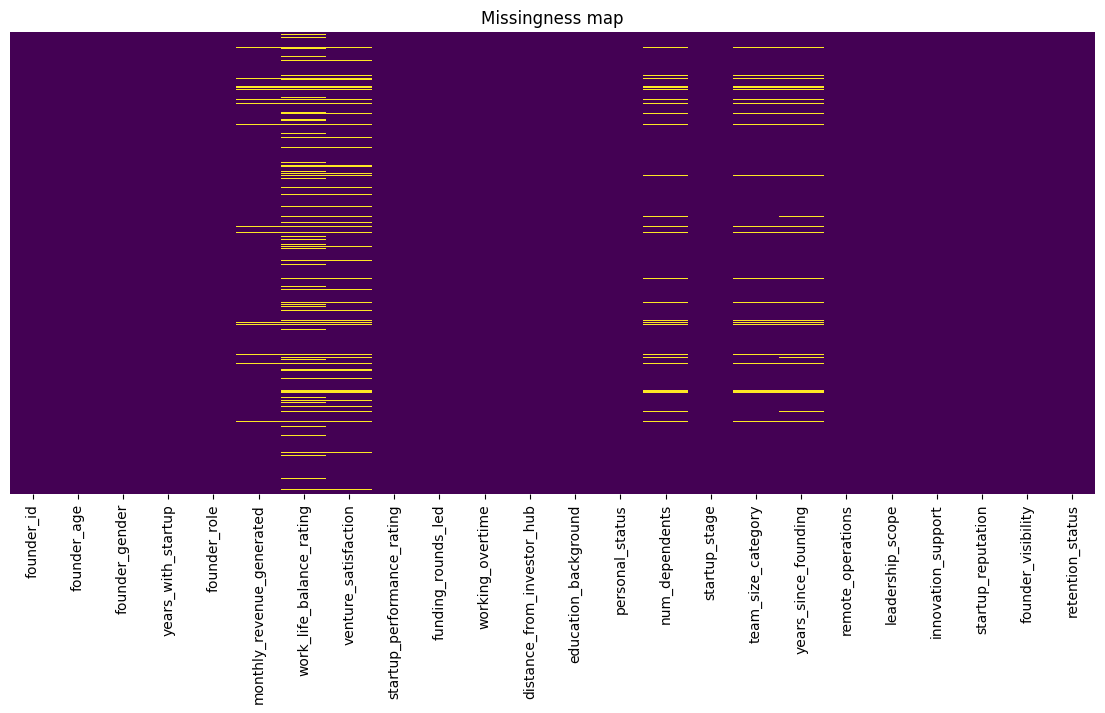

In [35]:
#missing values check
missing_pct=train.isnull().mean().sort_values(ascending=False)
display(pd.DataFrame({'missing_pct':missing_pct}))

#plot the missingness map 
plt.figure(figsize=(14,6))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missingness map')
plt.show()

In [36]:
# Columns that actually have missing values
missing_cols_cat = [
    "work_life_balance_rating", # cat
    "venture_satisfaction", # cat
    "team_size_category", # cat
]

missing_cols_num = [
    "num_dependents", #num
    "years_since_founding", #num
    "monthly_revenue_generated" #num
]


# missing flags 
for col in missing_cols_cat:
    train[col + "_missing"] = train[col].isnull().astype(int)
    test[col + "_missing"] = test[col].isnull().astype(int)

for col in missing_cols_num:
    train[col + "_missing"] = train[col].isnull().astype(int)
    test[col + "_missing"] = test[col].isnull().astype(int)

In [37]:
from sklearn.impute import SimpleImputer

# Numerical imputation (median value)
num_imputer = SimpleImputer(strategy='median')

train[missing_cols_num] = num_imputer.fit_transform(train[missing_cols_num])
test[missing_cols_num] = num_imputer.transform(test[missing_cols_num])

# Categorical imputation (most frequent value)
cat_imputer = SimpleImputer(strategy='most_frequent')

train[missing_cols_cat] = cat_imputer.fit_transform(train[missing_cols_cat])
test[missing_cols_cat] = cat_imputer.transform(test[missing_cols_cat])

In [38]:
# check if all missing values are gone 
train.isnull().sum()

founder_id                           0
founder_age                          0
founder_gender                       0
years_with_startup                   0
founder_role                         0
monthly_revenue_generated            0
work_life_balance_rating             0
venture_satisfaction                 0
startup_performance_rating           0
funding_rounds_led                   0
working_overtime                     0
distance_from_investor_hub           0
education_background                 0
personal_status                      0
num_dependents                       0
startup_stage                        0
team_size_category                   0
years_since_founding                 0
remote_operations                    0
leadership_scope                     0
innovation_support                   0
startup_reputation                   0
founder_visibility                   0
retention_status                     0
work_life_balance_rating_missing     0
venture_satisfaction_miss

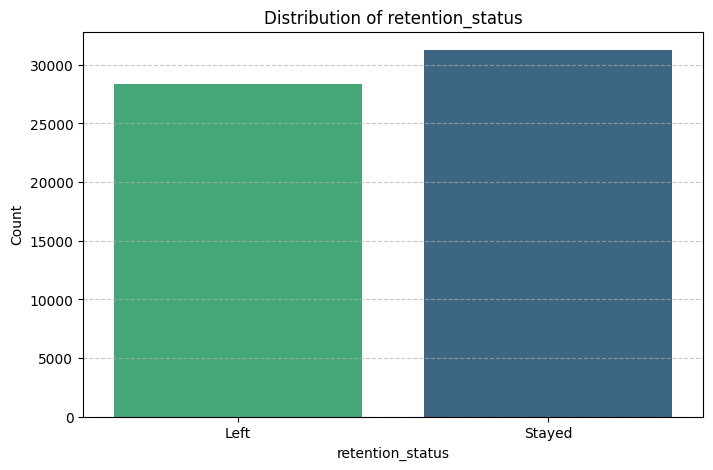

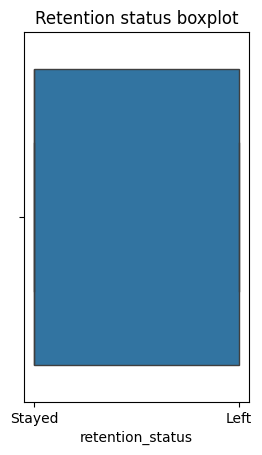

In [39]:
#  EXPLORATORY DATA ANALYSIS 

# 4.1 Target Variable Distribution
target_col = 'retention_status'
plt.figure(figsize=(8, 5))
sns.countplot(x=target_col,hue=target_col, data=train, palette='viridis', order=sorted(train[target_col].unique()), legend=False)
plt.title('Distribution of retention_status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.subplot(1,2,2)
sns.boxplot(x=train[target_col])
plt.title('Retention status boxplot')
plt.show()

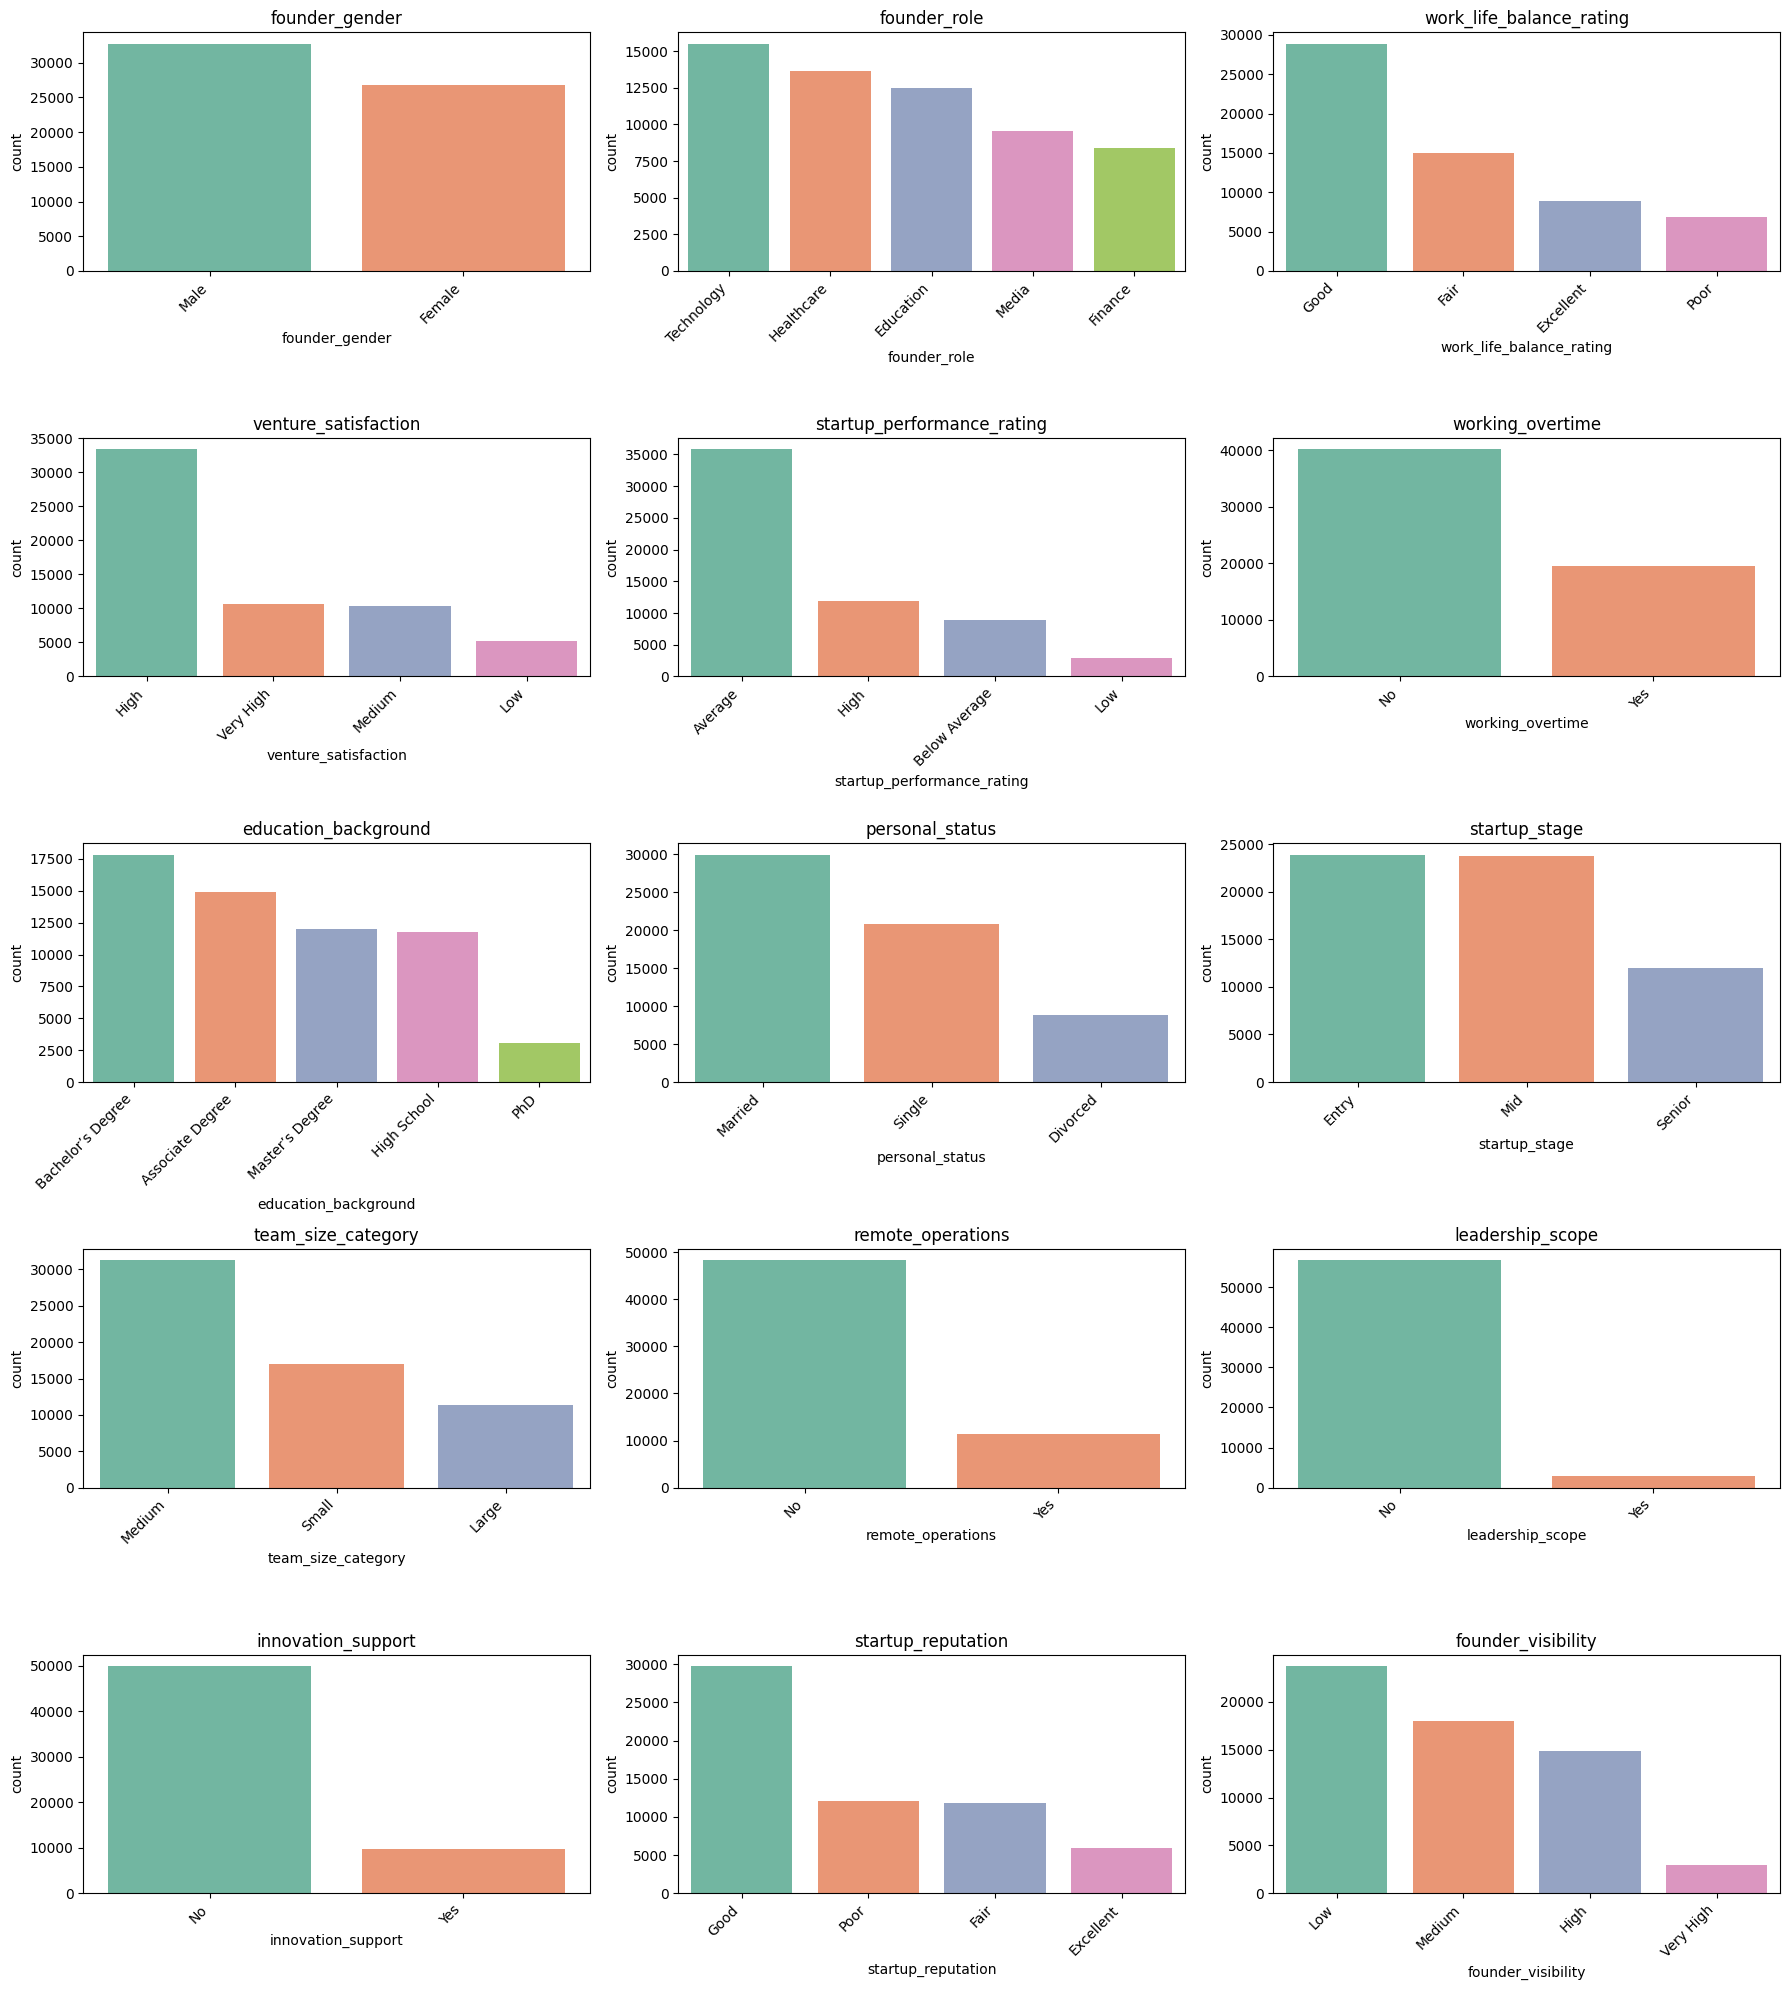

In [40]:
# plot all the categorical features 
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Number of categorical columns
n = len(cat_cols)

# Dynamic grid: 3 columns, as many rows as needed
rows = math.ceil(n / 3)
cols = 3

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(
        data=train,
        x=col,
        order=train[col].value_counts().index,
        palette="Set2"
    )
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


=== Plotting Numerical Features (Histogram + Boxplot) ===



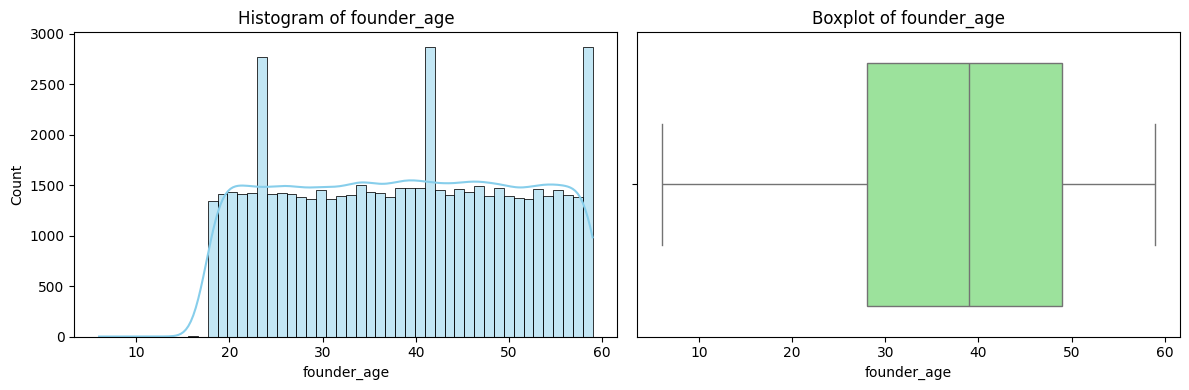

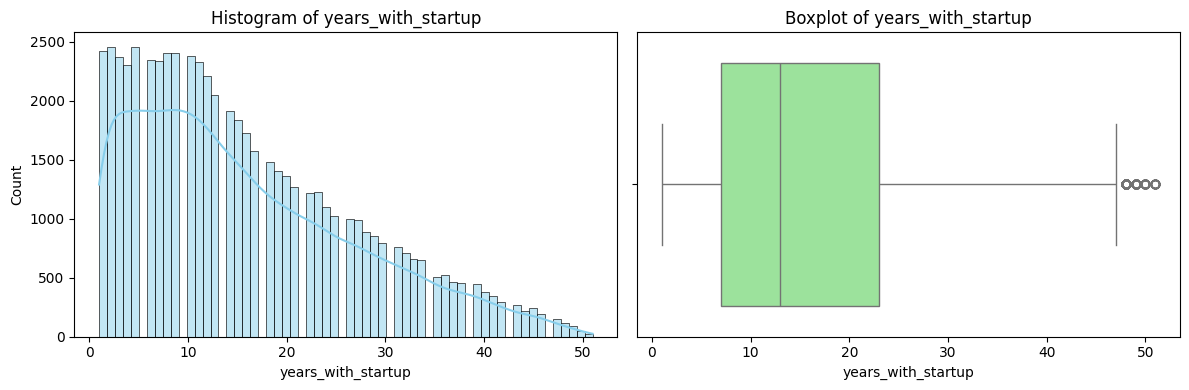

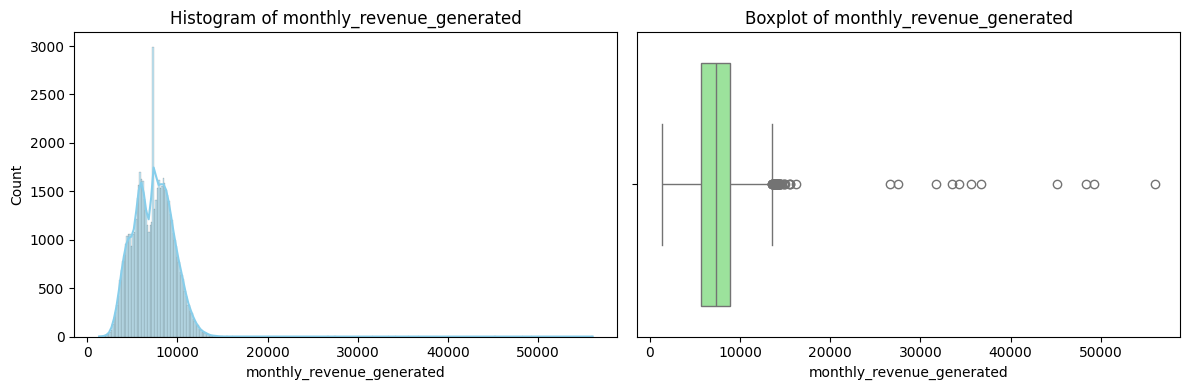

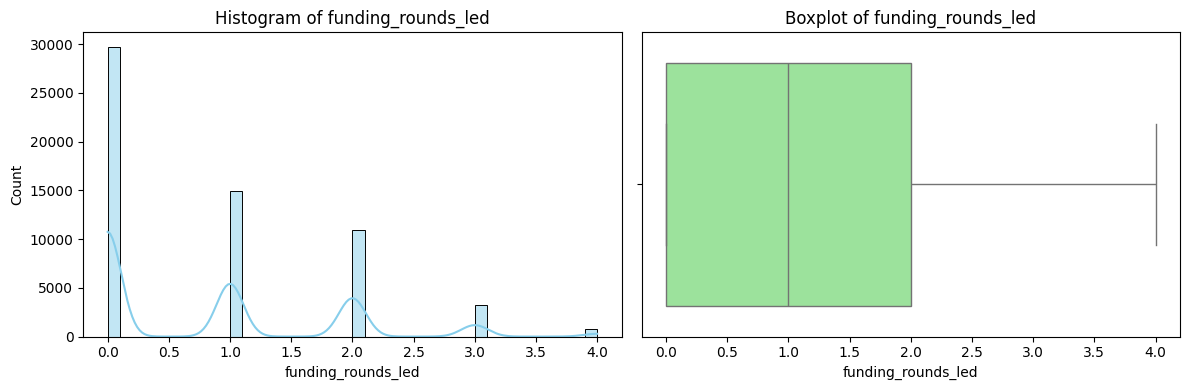

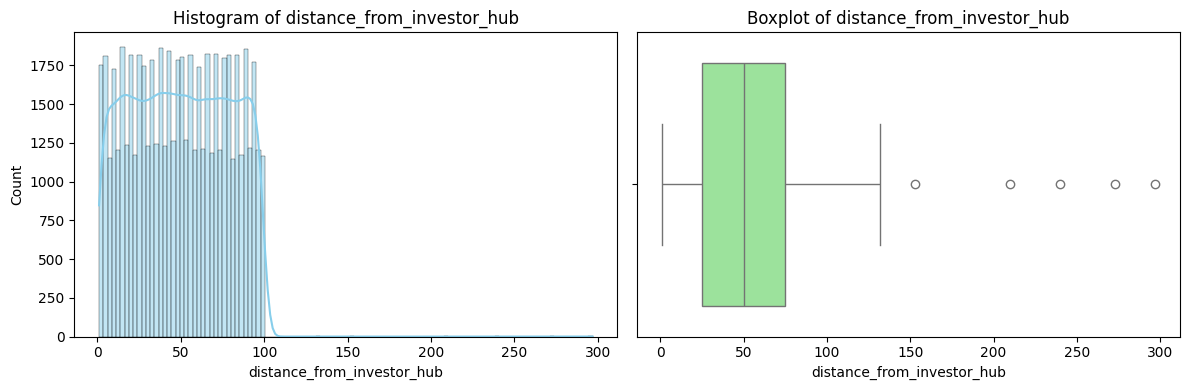

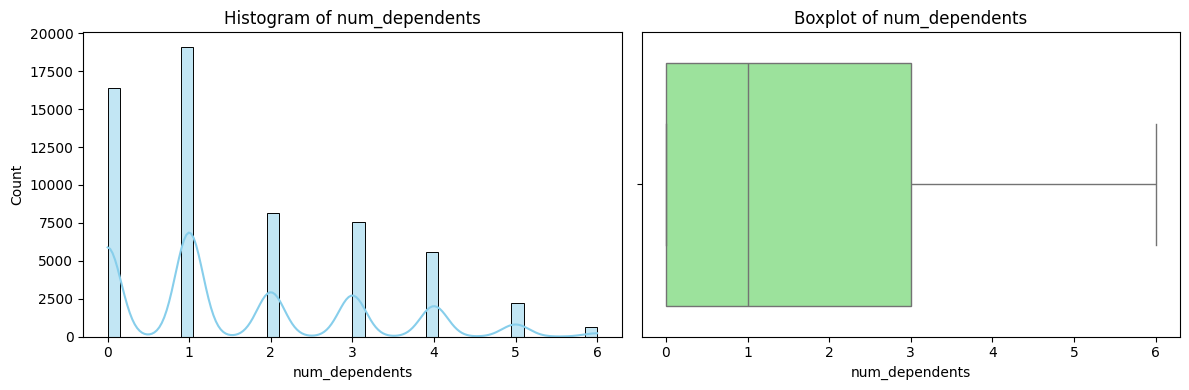

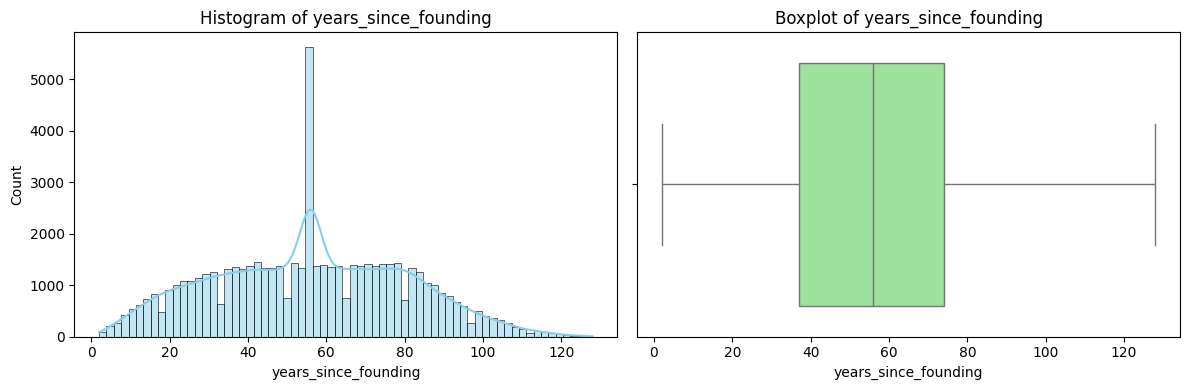

In [41]:
# Plotting Numerical Features (Histograms & Boxplots)
import seaborn as sns
import matplotlib.pyplot as plt

# numeric columns list you already defined
num_cols_plot = num_cols   # reuse your list

print("=== Plotting Numerical Features (Histogram + Boxplot) ===\n")

for col in num_cols_plot:
    plt.figure(figsize=(12, 4))
    
    # --- Histogram ---
    plt.subplot(1, 2, 1)
    sns.histplot(train[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    
    # --- Boxplot ---
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


In [42]:
train['retention_status'].unique()


array(['Stayed', 'Left'], dtype=object)

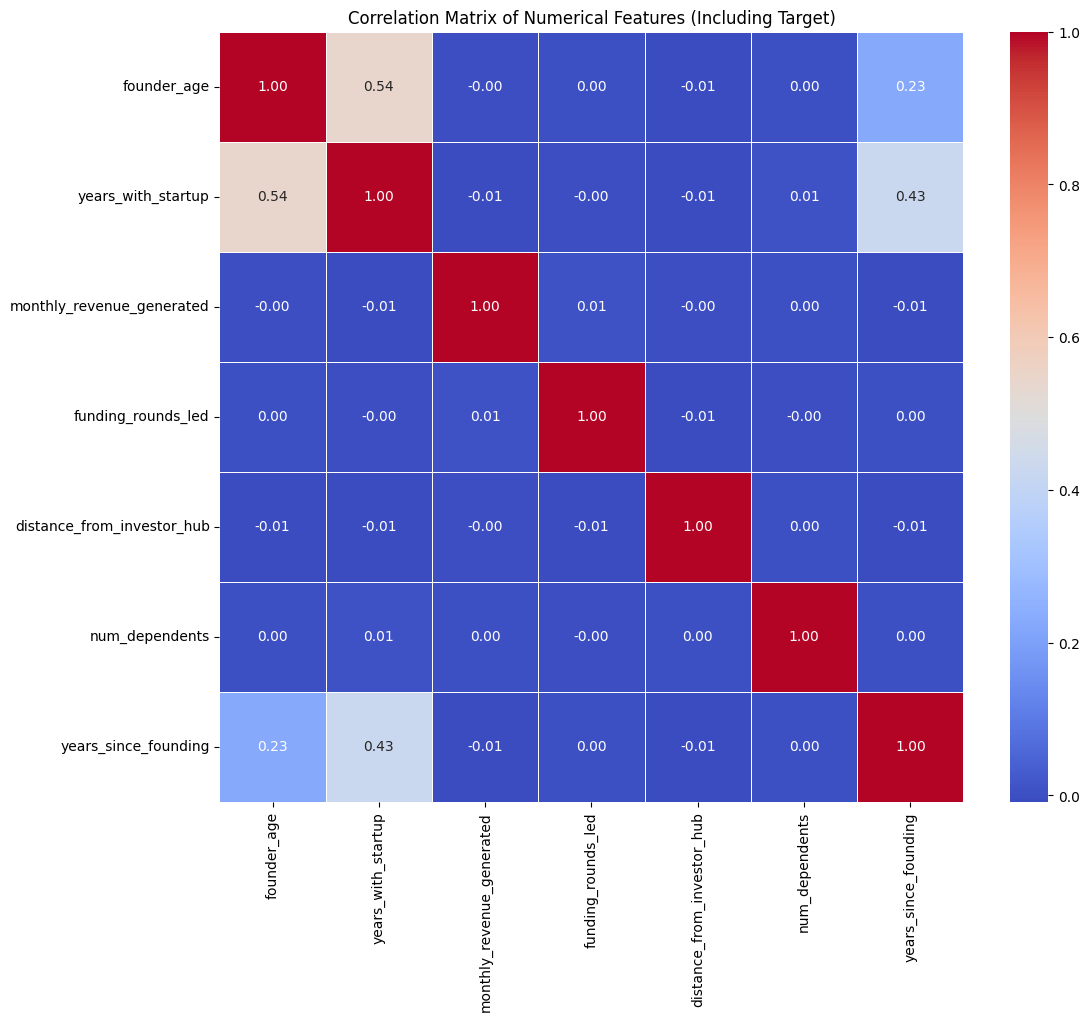

In [43]:
# 4.5 Correlation Matrix (Numerical Only)
# Convert target into numeric form
train['retention_status'] = train['retention_status'].map({
    'Stayed': 1,
    'Left': 0
}).astype(int)

numeric_cols = [
    'founder_age',
    'years_with_startup',
    'monthly_revenue_generated',
    'funding_rounds_led',
    'distance_from_investor_hub',
    'num_dependents',
    'years_since_founding',
]

# 4.5 Correlation Matrix (NUMERICAL FEATURES ONLY)

import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = train[numeric_cols]   # subset only your numeric columns

plt.figure(figsize=(12, 10))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Matrix of Numerical Features (Including Target)')
plt.show()


--- Plotting Numeric Features vs Target (LOWESS-style) ---


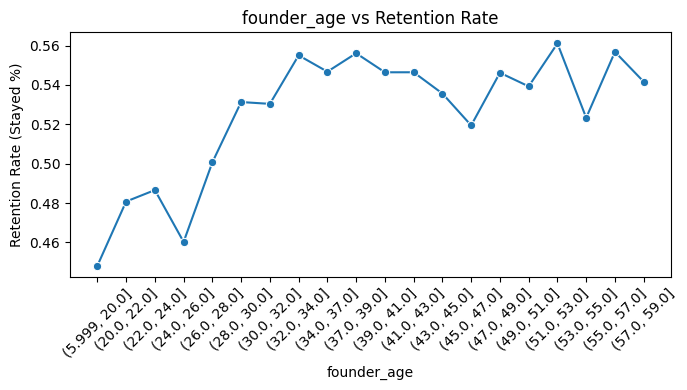

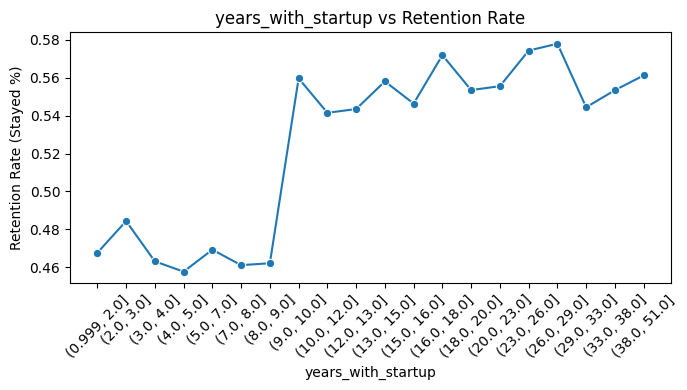

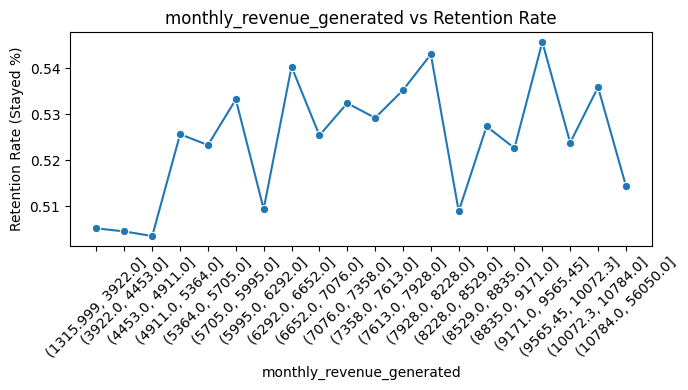

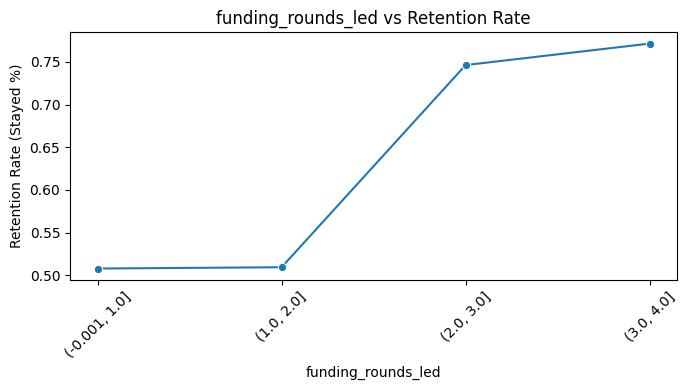

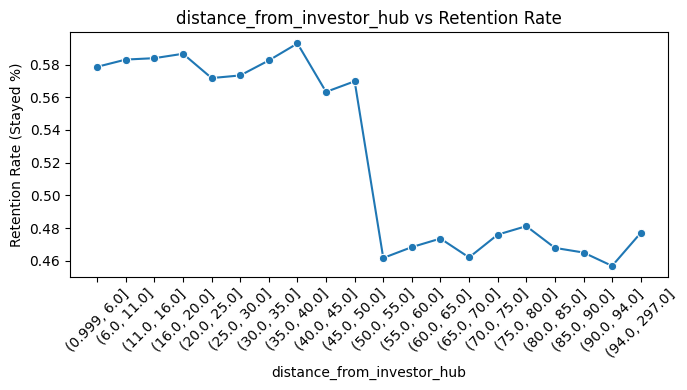

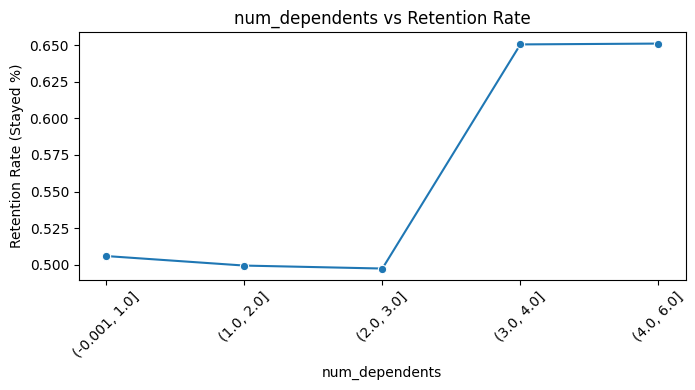

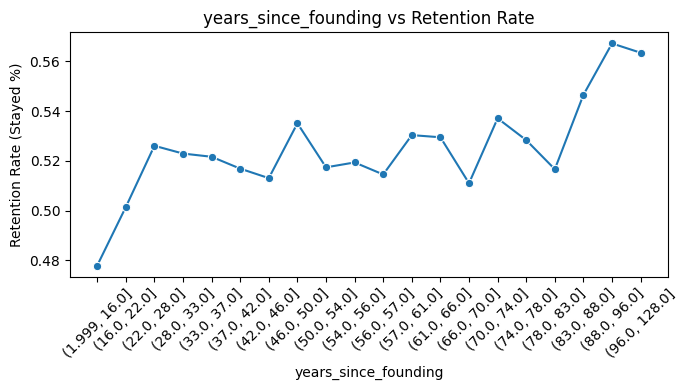

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("--- Plotting Numeric Features vs Target (LOWESS-style) ---")

for col in num_cols:
    if train[col].nunique() > 2:

        # Create numeric bins for smooth trend
        train['_bin'] = pd.qcut(train[col], q=20, duplicates='drop')

        grouped = train.groupby('_bin')['retention_status'].mean()

        plt.figure(figsize=(7, 4))

        # Line showing smooth retention trend vs numeric variable
        sns.lineplot(x=grouped.index.astype(str), y=grouped.values, marker="o")

        plt.xticks(rotation=45)
        plt.title(f"{col} vs Retention Rate")
        plt.ylabel("Retention Rate (Stayed %)")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

train.drop(columns=['_bin'], inplace=True)


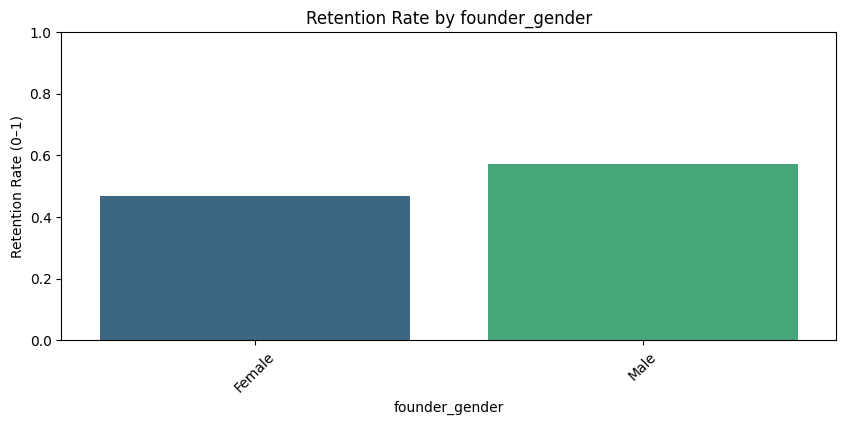

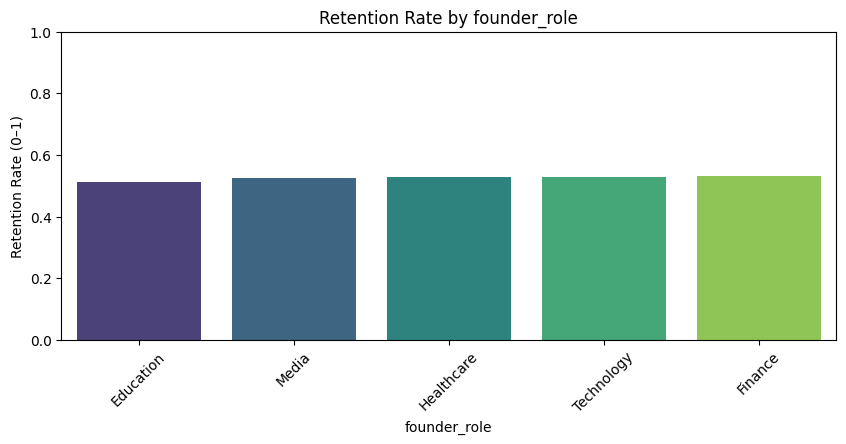

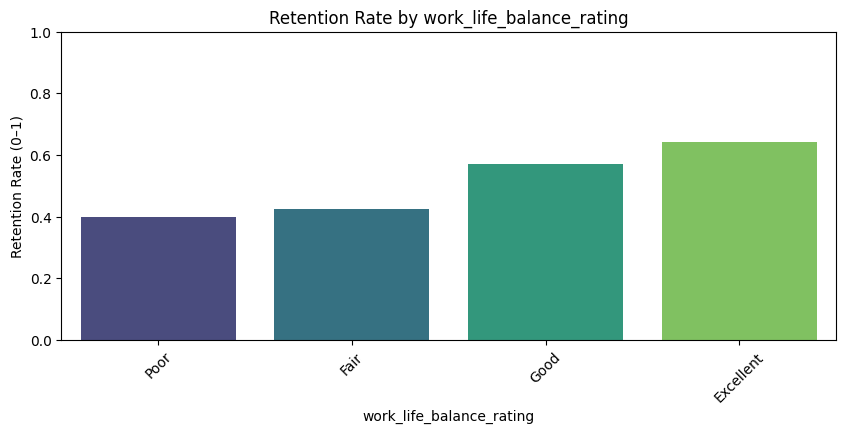

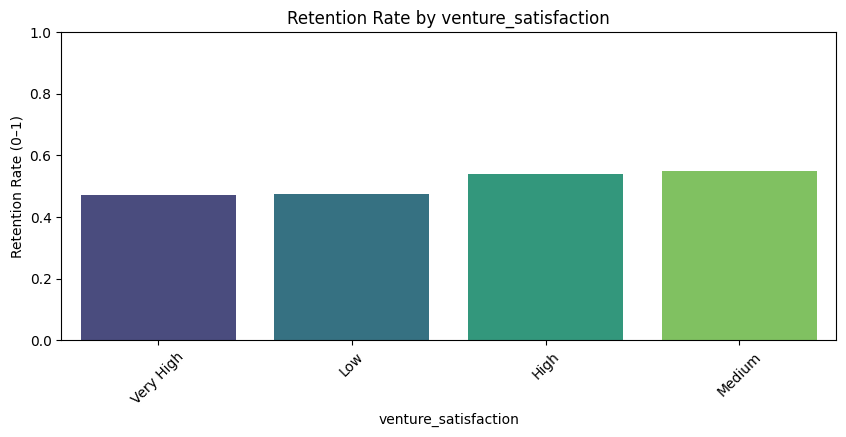

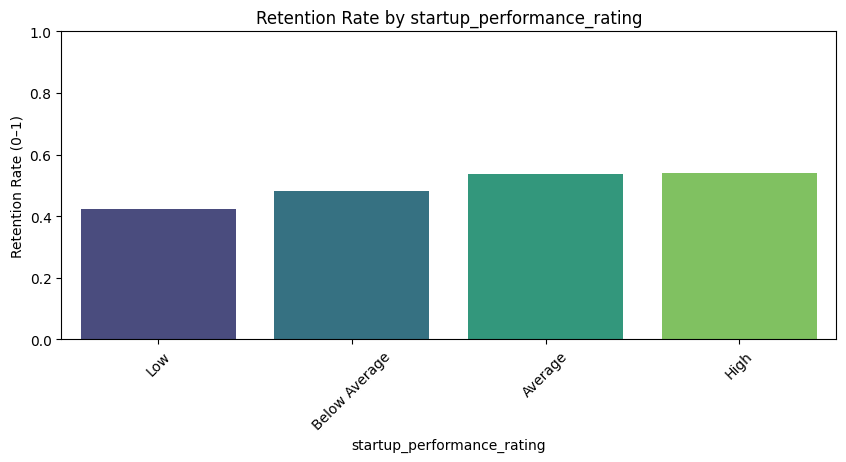

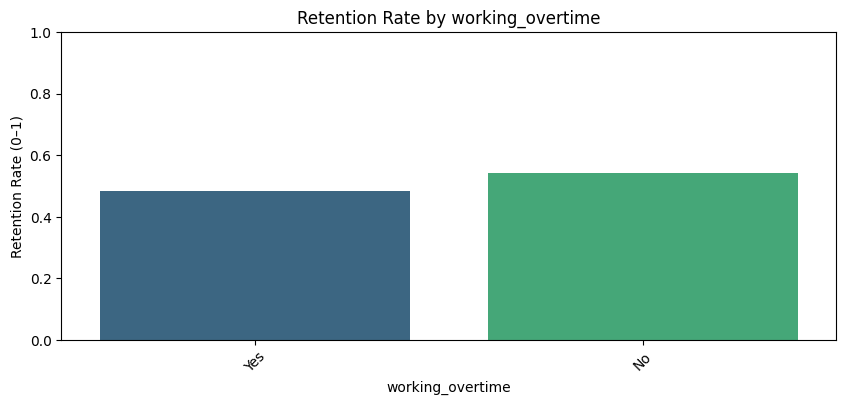

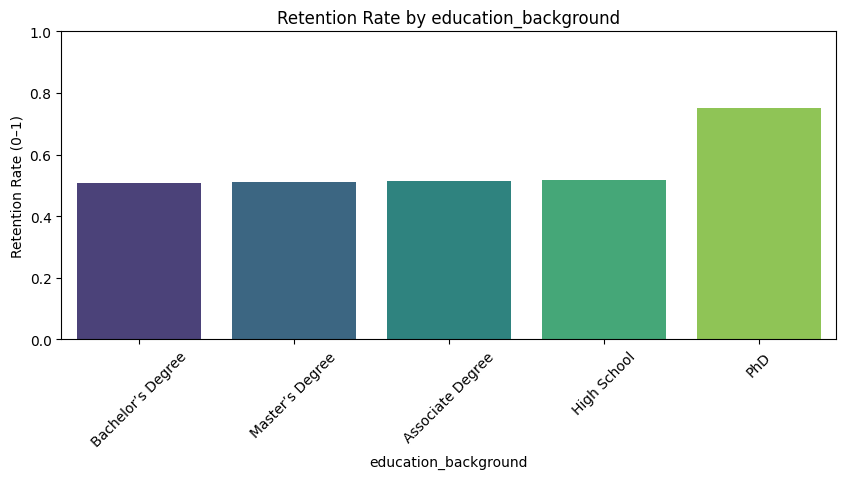

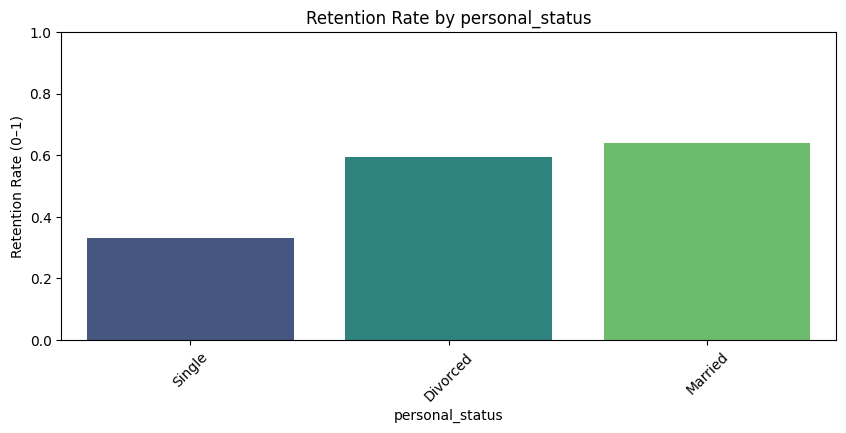

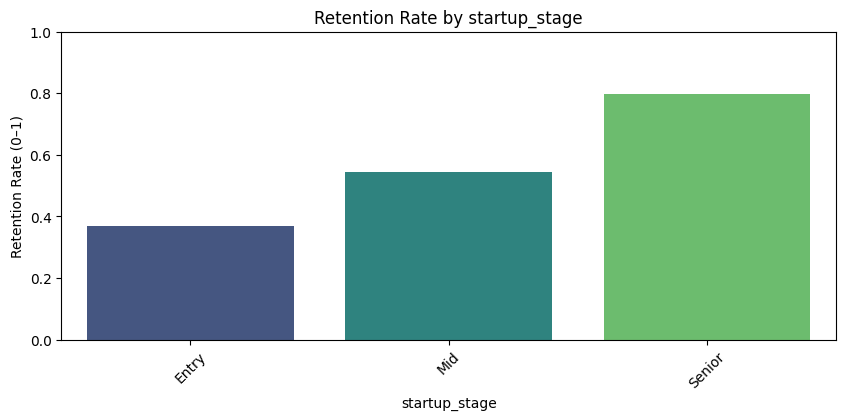

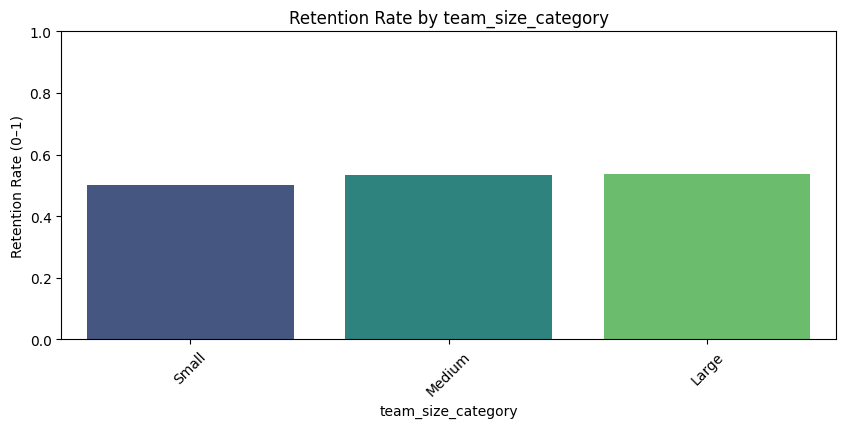

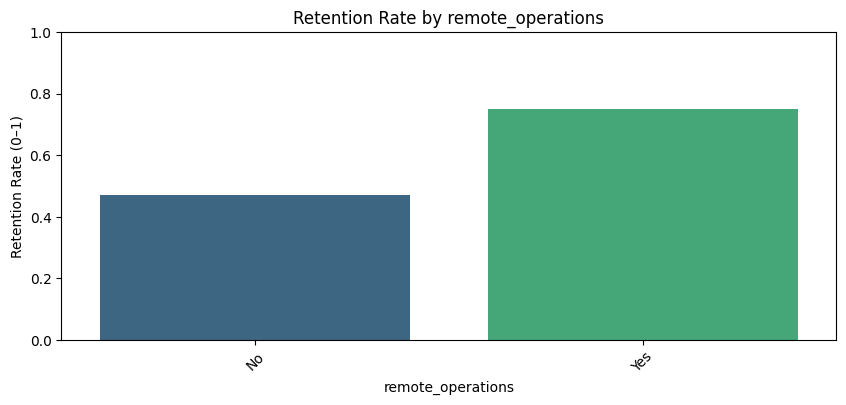

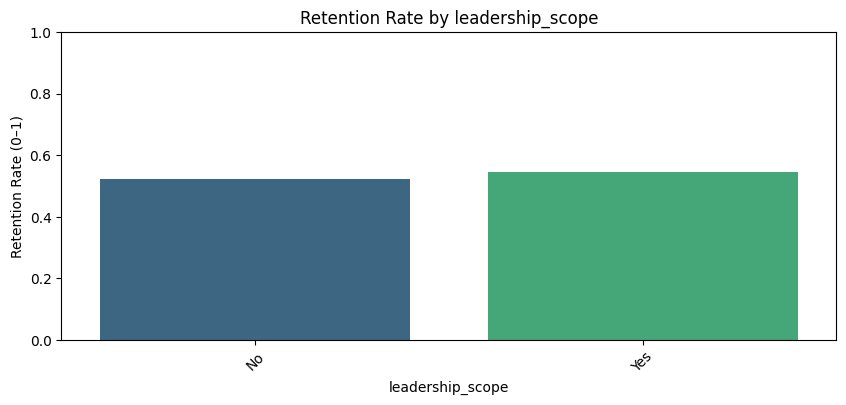

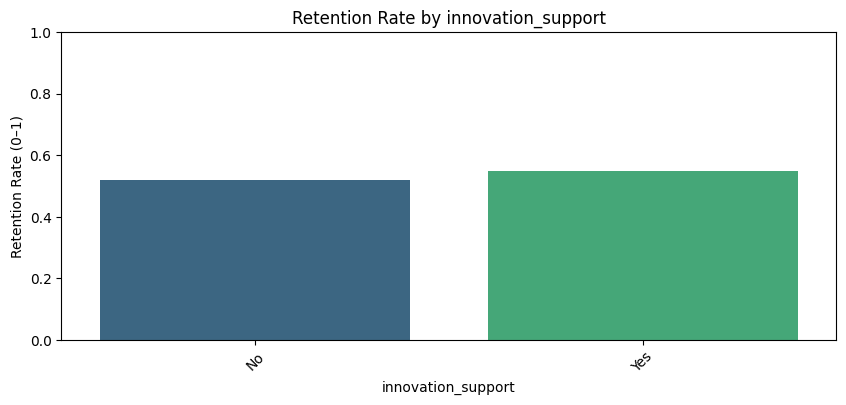

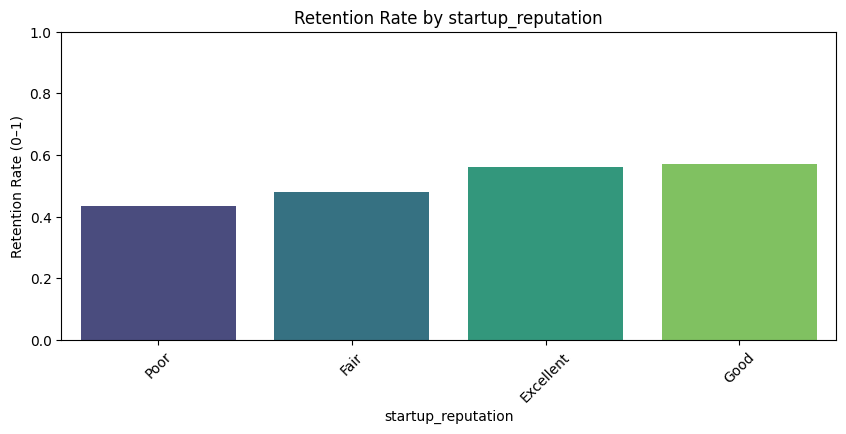

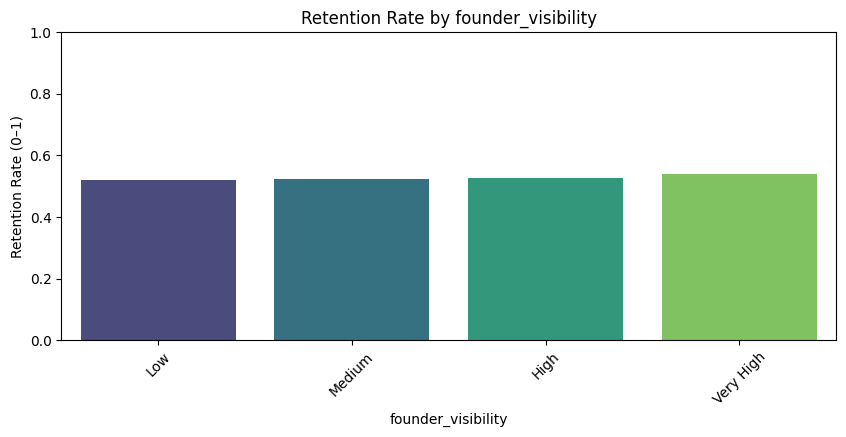

In [45]:
for col in cat_cols:
    plt.figure(figsize=(10,4))

    rate = train.groupby(col)['retention_status'].mean().sort_values()

    sns.barplot(x=rate.index, y=rate.values, palette="viridis")

    plt.title(f"Retention Rate by {col}")
    plt.ylabel("Retention Rate (0–1)")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()


In [46]:
from scipy.stats import chi2_contingency
import pandas as pd

target_col = "retention_status"   # 1 = Stayed, 0 = Left

print(f"=== Chi-Square Test Results (Target: {target_col}) ===")
print(f"{'Feature':<35} | {'P-Value':<10} | {'Conclusion'}")
print("-" * 75)

results = []

for col in cat_cols:

    # Create contingency table
    contingency_table = pd.crosstab(train[col].astype(str), train[target_col])

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpretation
    if p < 0.05:
        conclusion = "Significant (KEEP)"
    else:
        conclusion = "Not Significant (Consider Drop)"

    print(f"{col:<35} | {p:.5f}    | {conclusion}")

    results.append({'Feature': col, 'P-Value': p, 'Significant': p < 0.05})


# Sorted results table
print("\n--- Sorted Results (Most Significant First) ---")
results_df = pd.DataFrame(results).sort_values(by='P-Value')
display(results_df)


=== Chi-Square Test Results (Target: retention_status) ===
Feature                             | P-Value    | Conclusion
---------------------------------------------------------------------------
founder_gender                      | 0.00000    | Significant (KEEP)
founder_role                        | 0.04908    | Significant (KEEP)
work_life_balance_rating            | 0.00000    | Significant (KEEP)
venture_satisfaction                | 0.00000    | Significant (KEEP)
startup_performance_rating          | 0.00000    | Significant (KEEP)
working_overtime                    | 0.00000    | Significant (KEEP)
education_background                | 0.00000    | Significant (KEEP)
personal_status                     | 0.00000    | Significant (KEEP)
startup_stage                       | 0.00000    | Significant (KEEP)
team_size_category                  | 0.00000    | Significant (KEEP)
remote_operations                   | 0.00000    | Significant (KEEP)
leadership_scope                 

,Feature,P-Value,Significant
2,work_life_balance_rating,0.000000e+00,True
7,personal_status,0.000000e+00,True
10,remote_operations,0.000000e+00,True
8,startup_stage,0.000000e+00,True
13,startup_reputation,1.156323e-165,True
6,education_background,4.613727e-145,True
0,founder_gender,2.582045e-136,True
3,venture_satisfaction,3.341119e-50,True
4,startup_performance_rating,1.044209e-47,True
5,working_overtime,5.245462e-42,True


In [47]:
from scipy.stats import zscore

outlier_summary = {}

for col in num_cols:
    z = abs(zscore(train[col]))
    outlier_count = (z > 3).sum()
    outlier_summary[col] = outlier_count

print("=== Outlier Counts (z > 3) ===")
display(pd.Series(outlier_summary).sort_values(ascending=False))


=== Outlier Counts (z > 3) ===


funding_rounds_led            788
years_with_startup             75
monthly_revenue_generated      52
distance_from_investor_hub      5
founder_age                     0
num_dependents                  0
years_since_founding            0
dtype: int64

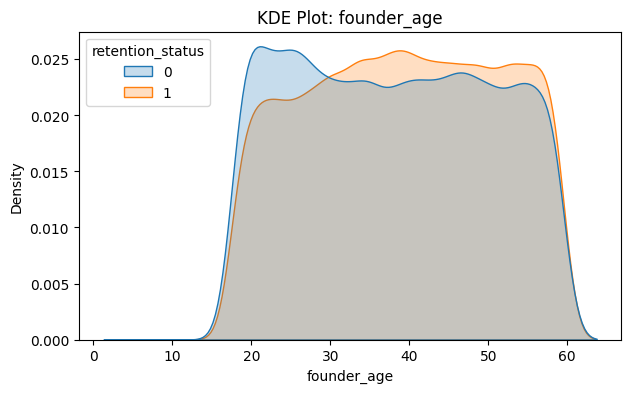

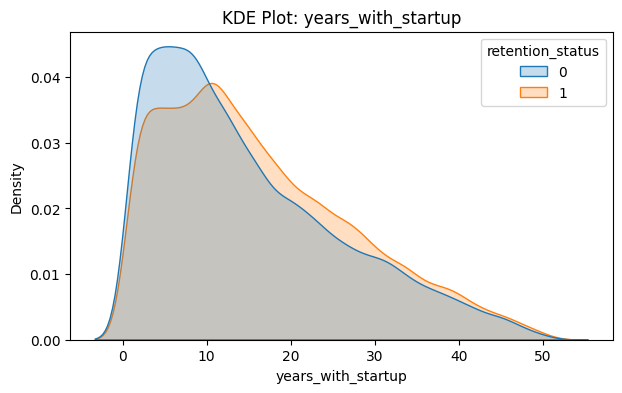

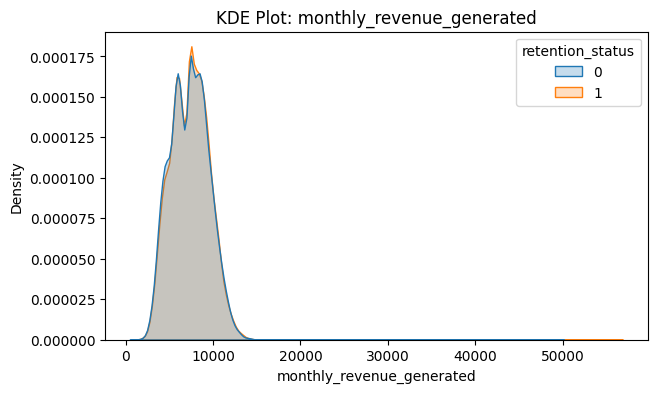

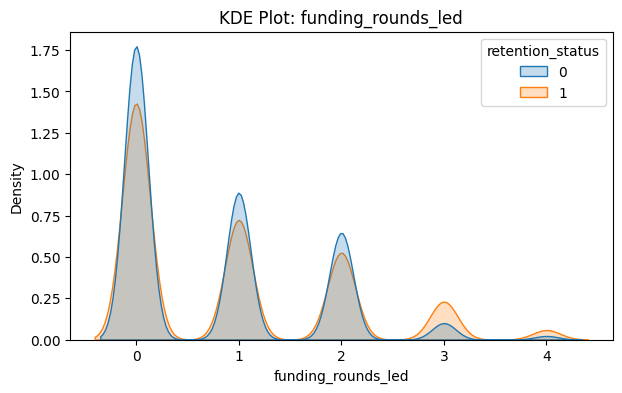

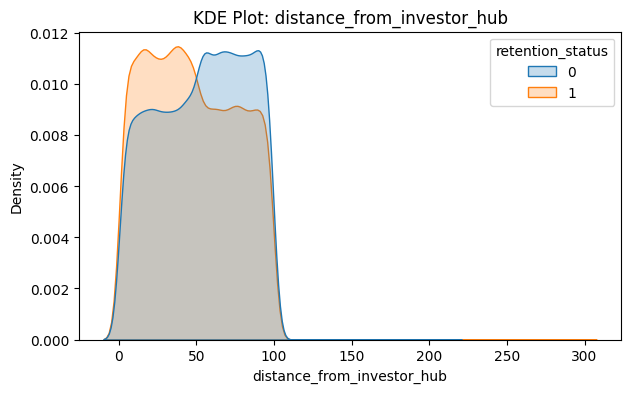

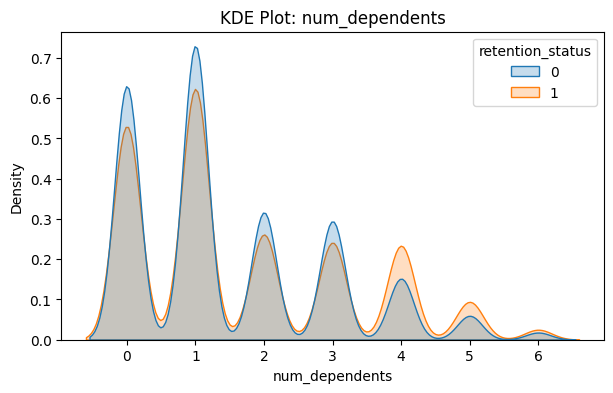

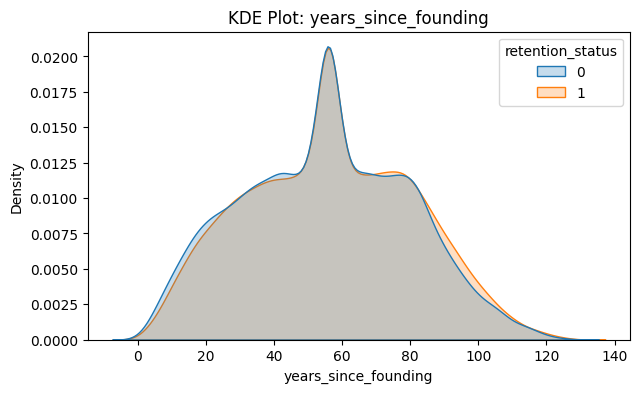

In [48]:
# --- INTERPRETATION GUIDE (What does this plot tell you?) ---
    # 1. SEPARATION (Discriminative Power):
    #    - Look at the peaks of different colors (clusters).
    #    - If the peaks are far apart (e.g., Cluster A is at 0, Cluster B is at 100),
    #      it means this feature is VERY GOOD at distinguishing between those clusters.
    
    # 2. OVERLAP (Redundancy):
    #    - If the curves for all clusters sit right on top of each other (perfect overlap),
    #      it means this feature behaves the same way for everyone.
    #    - High overlap = Low predictive value for this specific feature.
    
    # 3. SHAPE (Distribution):
    #    - Bell curve? The data is normally distributed.
    #    - Two peaks (Bimodal)? There might be two distinct subgroups within that cluster.
    #    - Long tail? The data is skewed (has outliers on one side).

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=train, x=col, hue="retention_status", fill=True, common_norm=False)
    plt.title(f"KDE Plot: {col}")
    plt.show()


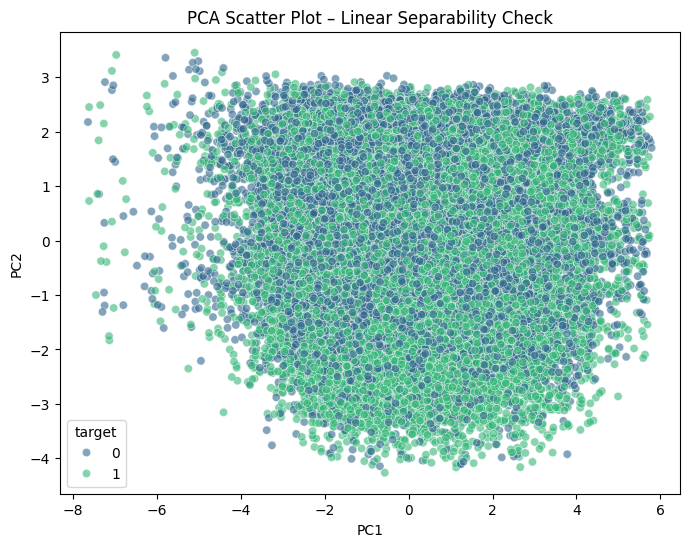

Running t-SNE... may take 30–60 sec...


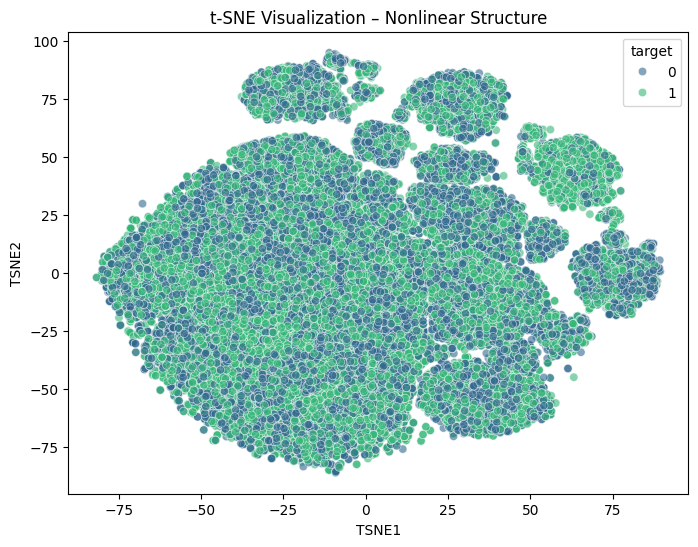

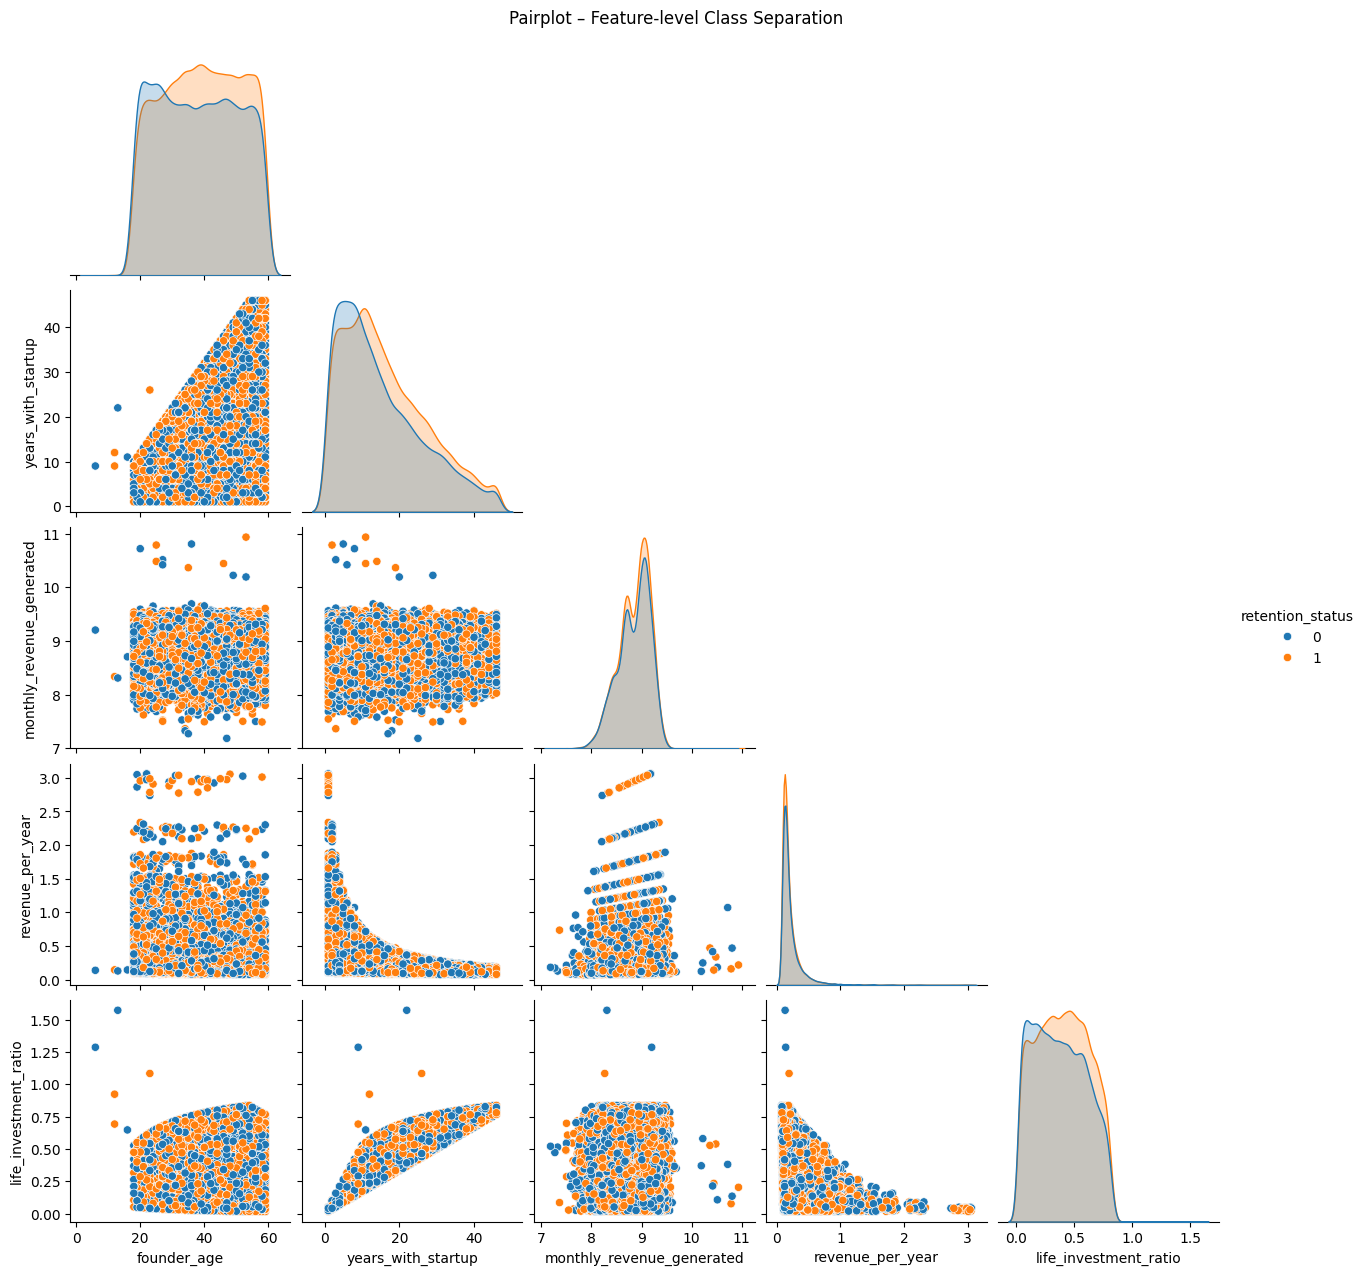

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# -------------------------------
# 1. Load Data
# -------------------------------
train = pd.read_csv("train.csv")
train["retention_status"] = train["retention_status"].map({"Stayed": 1, "Left": 0})


# -------------------------------
# 2. Outlier Handling
# -------------------------------
def handle_outliers(df):
    df = df.copy()
    if "monthly_revenue_generated" in df.columns:
        df["monthly_revenue_generated"] = np.log1p(df["monthly_revenue_generated"])
    for col in ["founder_age", "years_with_startup", "years_since_founding"]:
        if col in df.columns:
            df[col] = df[col].clip(upper=df[col].quantile(0.99))
    return df

train = handle_outliers(train)


# -------------------------------
# 3. Feature Engineering
# -------------------------------
train["years_since_founding"] = train["years_since_founding"].fillna(
    train["years_since_founding"].median()
)

train["revenue_per_year"] = train["monthly_revenue_generated"] / (train["years_since_founding"] + 1)
train["life_investment_ratio"] = train["years_with_startup"] / (train["founder_age"] + 1)
train["age_at_founding"] = train["founder_age"] - train["years_with_startup"]
train["revenue_per_round"] = train["monthly_revenue_generated"] / (train["funding_rounds_led"] + 1)

train["commitment_x_team"] = train["years_with_startup"] * train["team_size_category"].astype("category").cat.codes
train["satisfaction_x_balance"] = train["venture_satisfaction"].astype("category").cat.codes * \
                                  train["work_life_balance_rating"].astype("category").cat.codes


# -------------------------------
# 4. Separate Target + Drop ID
# -------------------------------
df = train.drop(columns=["founder_id"])  
y = df["retention_status"]
df = df.drop(columns=["retention_status"])


# -------------------------------
# 5. Impute Missing Values
# -------------------------------
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


# -------------------------------
# 6. One-Hot Encoding
# -------------------------------
df_encoded = pd.get_dummies(df, drop_first=True)


# -------------------------------
# 7. Scale Numeric Data
# -------------------------------
scaler = StandardScaler()
Z = scaler.fit_transform(df_encoded)


# ======================================================
# 8. PCA Visualization (Linear Separability)
# ======================================================
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(Z)

pca_df = pd.DataFrame({
    "PC1": pca_comp[:, 0],
    "PC2": pca_comp[:, 1],
    "target": y
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="viridis", alpha=0.6)
plt.title("PCA Scatter Plot – Linear Separability Check")
plt.show()


# ======================================================
# 9. t-SNE Visualization (Nonlinear Clusters)
# ======================================================
print("Running t-SNE... may take 30–60 sec...")

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_comp = tsne.fit_transform(Z)

tsne_df = pd.DataFrame({
    "TSNE1": tsne_comp[:, 0],
    "TSNE2": tsne_comp[:, 1],
    "target": y
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="target", palette="viridis", alpha=0.6)
plt.title("t-SNE Visualization – Nonlinear Structure")
plt.show()


# ======================================================
# 10. Pairplot (Feature-by-Feature Separability)
# ======================================================
top_features = [
    "founder_age",
    "years_with_startup",
    "monthly_revenue_generated",
    "revenue_per_year",
    "life_investment_ratio",
    "retention_status"
]

pair_df = train[top_features]

sns.pairplot(pair_df, hue="retention_status", diag_kind="kde", corner=True)
plt.suptitle("Pairplot – Feature-level Class Separation", y=1.02)
plt.show()
